# Load the merged dataset

Conclusion: we will use StandardScaler! The data is not normally distributed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [2]:
data_merged = pd.read_csv('../lung_pollution/data/covid_pollution_clean02.csv')

data_merged.shape

(4000, 24)

In [3]:
data_merged.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data_merged.head()

,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,...,BL,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k,fully_vaccinated,Population_density
0,Berlin,2010,21.33097,0.0,4.689645,48.14162,1.321674,75.383964,179.320467,161.912580,...,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091,0.688,290.118803
1,Berlin,2011,21.10792,0.0,5.591758,46.78272,1.405013,75.515257,179.361973,161.986524,...,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091,0.688,290.118803
2,Berlin,2012,20.65600,0.0,5.372472,45.26885,1.513209,75.685711,179.415858,162.082523,...,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091,0.688,290.118803
3,Berlin,2013,19.16632,0.0,4.376160,47.91164,0.142857,73.145140,171.855700,157.565400,...,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091,0.688,290.118803
4,Berlin,2014,20.46666,0.0,15.755060,47.80345,0.000000,71.659810,181.968600,166.539500,...,Berlin,259169,8.933202e+08,1.591636,242813,3759,6640.688066,103.703091,0.688,290.118803


There are no nulls in the data

## Testing the Raw Data: does the data have a normal distribution

In [7]:
X_num = data_merged.drop(columns=['county', 'BL', 'year'])

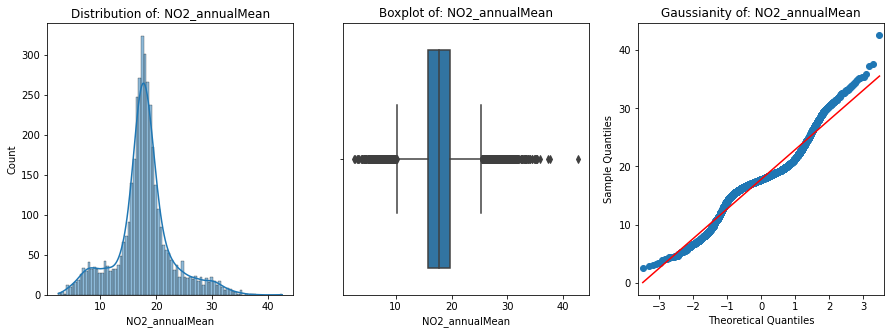

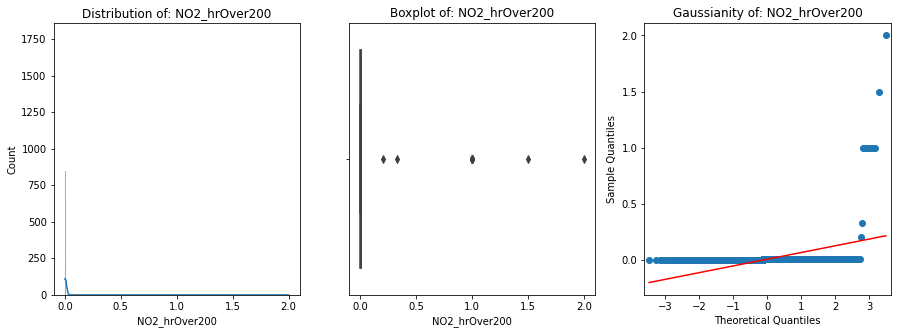

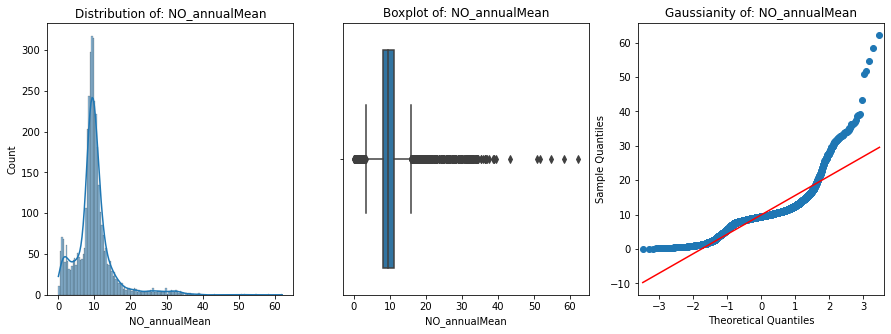

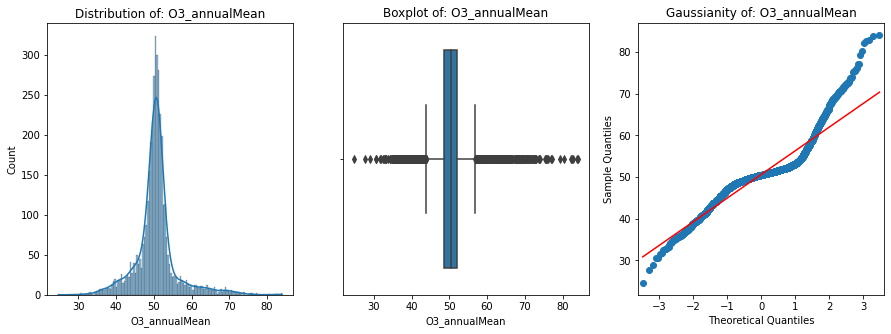

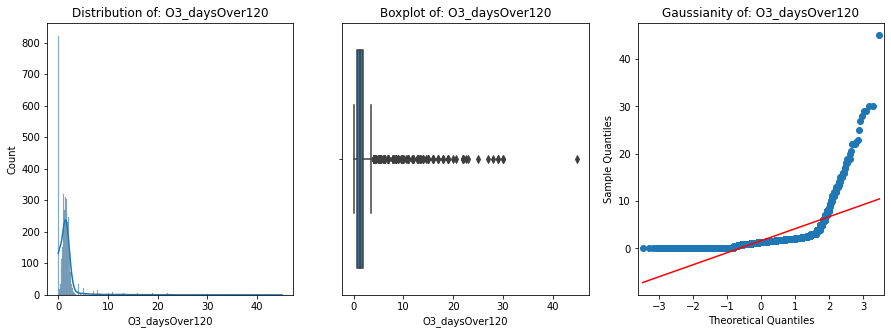

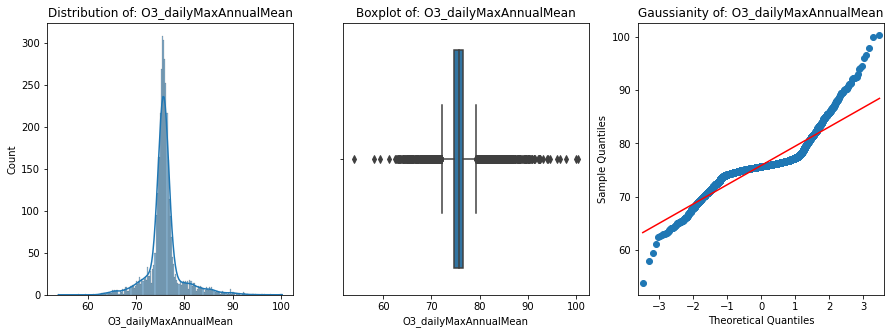

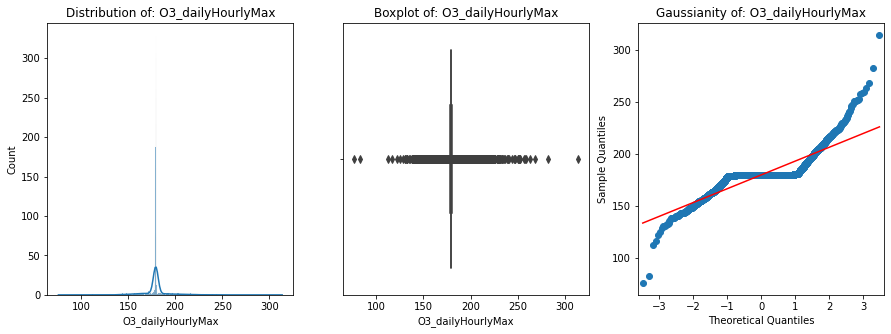

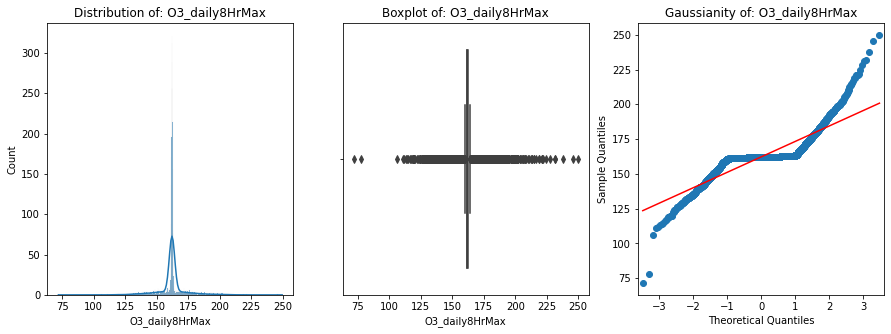

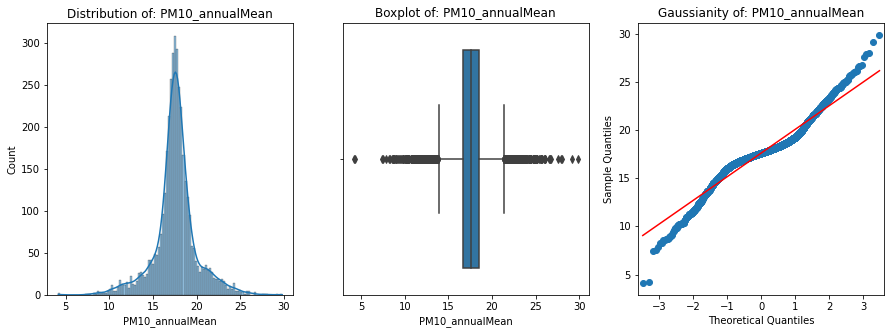

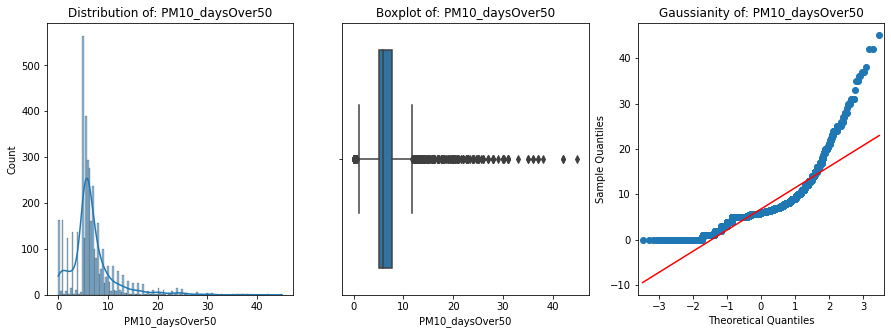

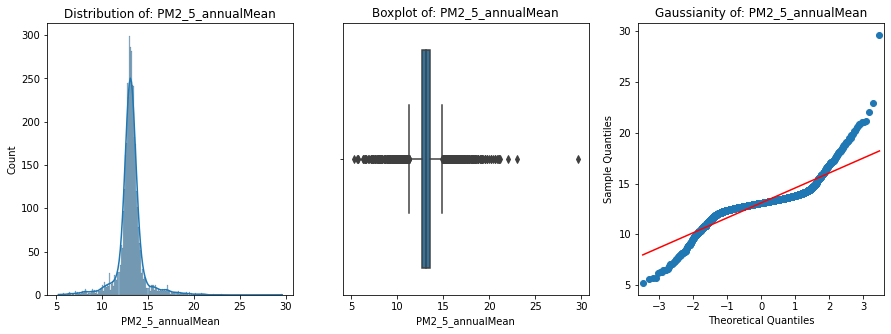

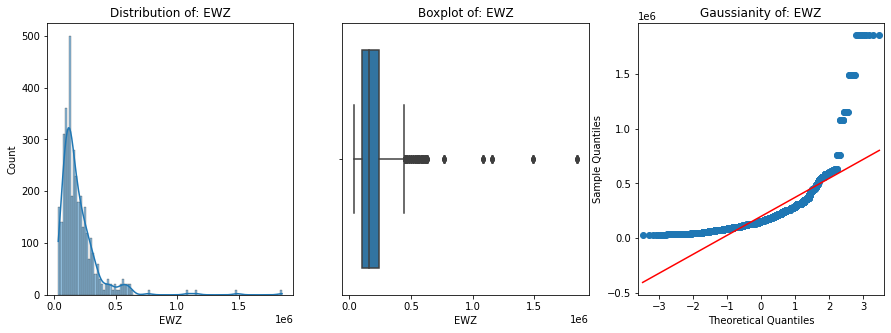

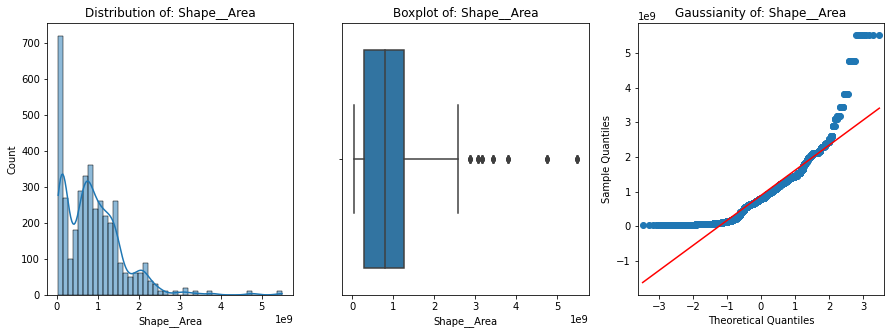

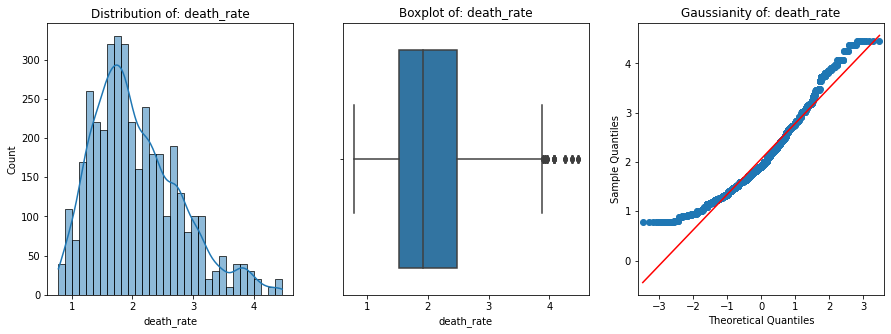

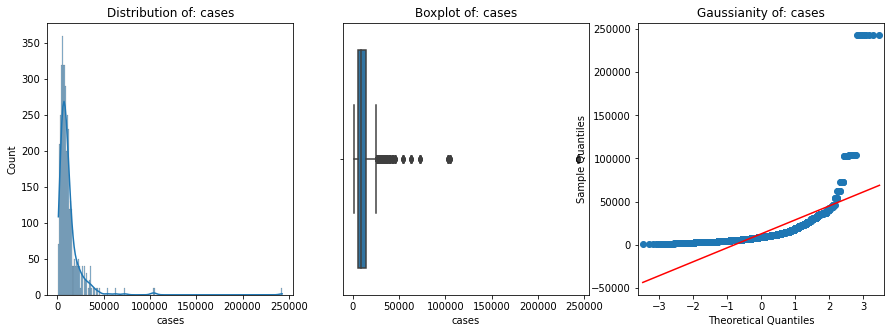

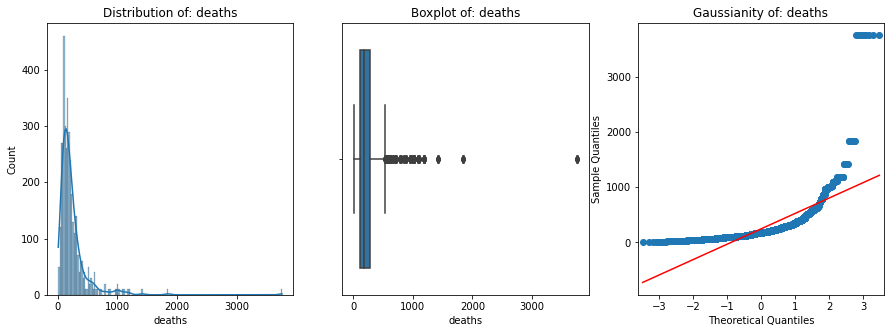

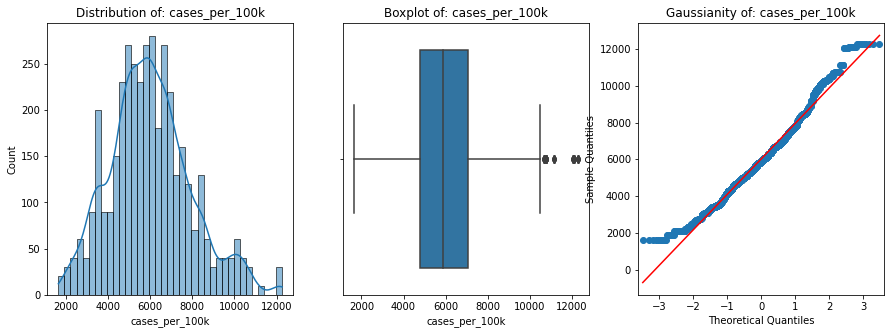

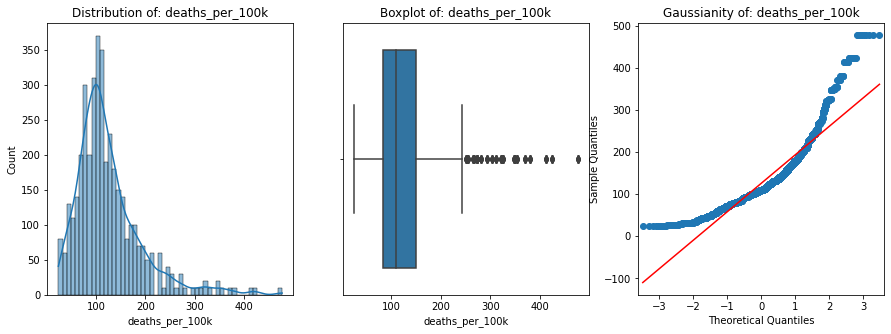

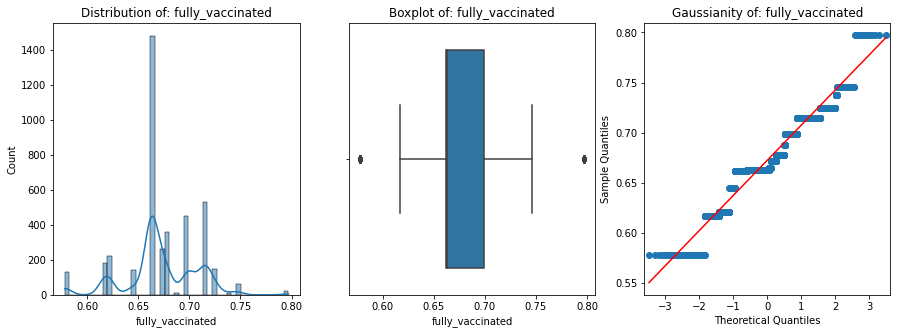

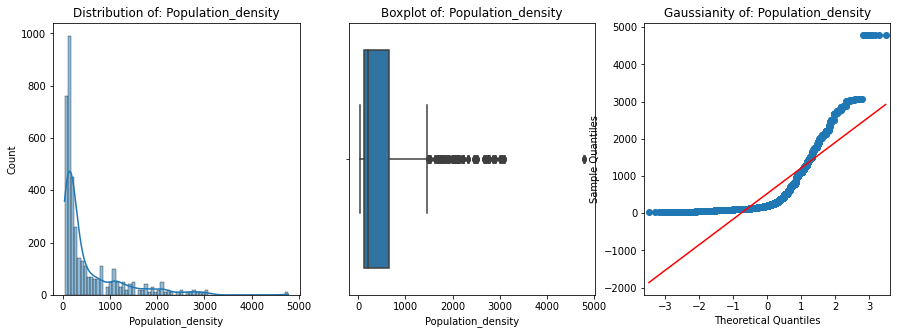

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

for numerical_feature in X_num.columns:
    
    fig, ax =plt.subplots(1,3,figsize=(15,5))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(x = X_num[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(x = X_num[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(X_num[numerical_feature],line='s',ax=ax[2])
    fig.show()

## Scaling the Data

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Robust Scaler, Standard Scaler, MinMaxScaler
# --------------------------------------------
rb_features = X_num 
ss_features = X_num 
mm_features = X_num 

rb_scaler = RobustScaler()
ss_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

rb_scaler.fit(rb_features)
ss_scaler.fit(ss_features)
mm_scaler.fit(mm_features)

X_scaled_rb_features = pd.DataFrame(rb_scaler.transform(rb_features), columns = X_num.columns)
X_scaled_ss_features = pd.DataFrame(ss_scaler.transform(ss_features), columns = X_num.columns)
X_scaled_mm_features = pd.DataFrame(mm_scaler.transform(mm_features), columns = X_num.columns)



In [75]:
X_scaled_rb_features.head()

,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,PM10_annualMean,PM10_daysOver50,PM2_5_annualMean,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k,fully_vaccinated,Population_density
0,0.940358,-0.828178,-1.514410,-0.713617,-0.018414,-0.164404,-0.115848,-0.137153,4.092647,9.009692,8.348874,0.745916,0.099132,-0.342409,28.821866,20.950292,0.333258,-0.085214,0.675676,0.164295
1,0.881592,-0.828178,-1.227147,-1.126901,0.051088,-0.091210,-0.050442,-0.070107,2.814410,7.262379,7.910859,0.745916,0.099132,-0.342409,28.821866,20.950292,0.333258,-0.085214,0.675676,0.164295
2,0.762525,-0.828178,-1.296975,-1.587317,0.141320,0.003814,0.034472,0.016935,1.582017,1.861587,4.568863,0.745916,0.099132,-0.342409,28.821866,20.950292,0.333258,-0.085214,0.675676,0.164295
3,0.370041,-0.828178,-1.614234,-0.783561,-1.001509,-1.412502,-11.879101,-4.078732,1.861193,2.602872,3.064890,0.745916,0.099132,-0.342409,28.821866,20.950292,0.333258,-0.085214,0.675676,0.164295
4,0.712640,-0.828178,2.009192,-0.816465,-1.120647,-2.240542,4.057177,4.058067,3.549629,5.938655,7.461795,0.745916,0.099132,-0.342409,28.821866,20.950292,0.333258,-0.085214,0.675676,0.164295


## Testing the Robust Scaler

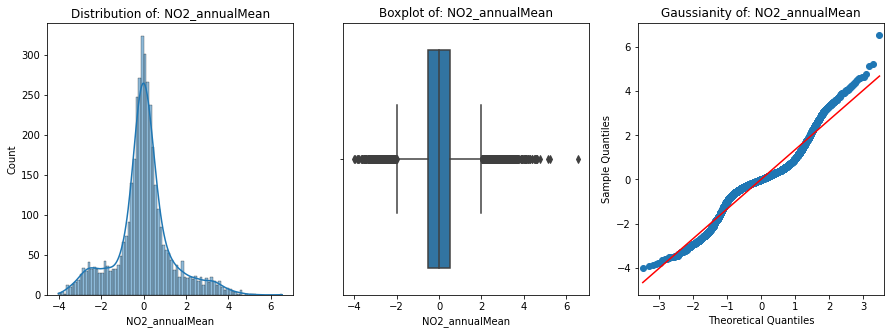

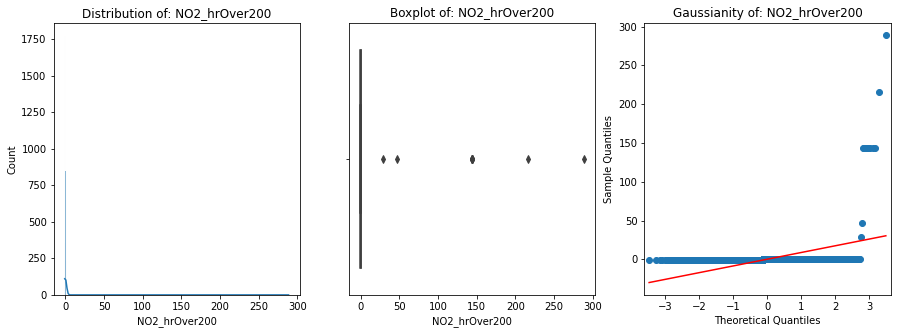

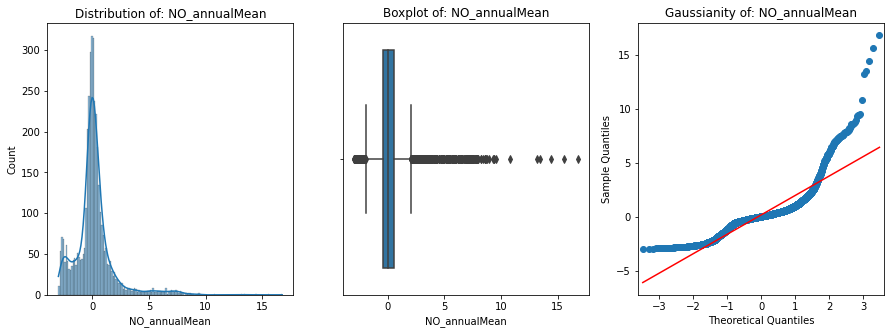

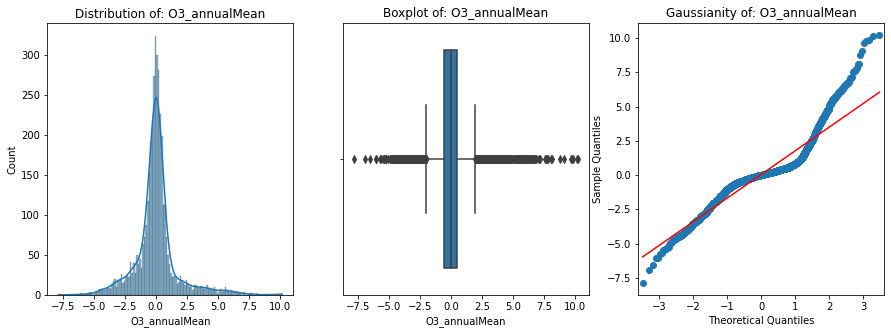

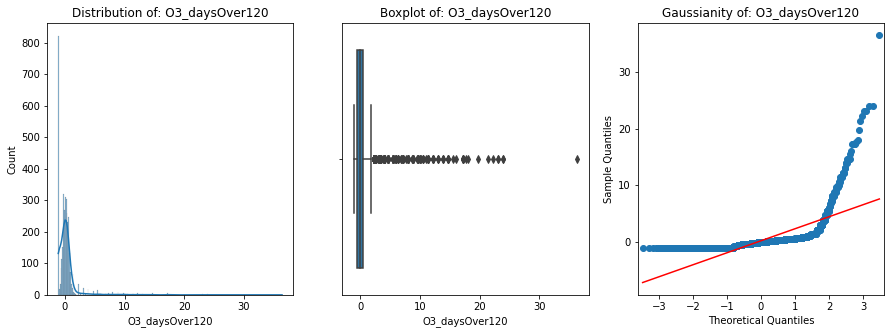

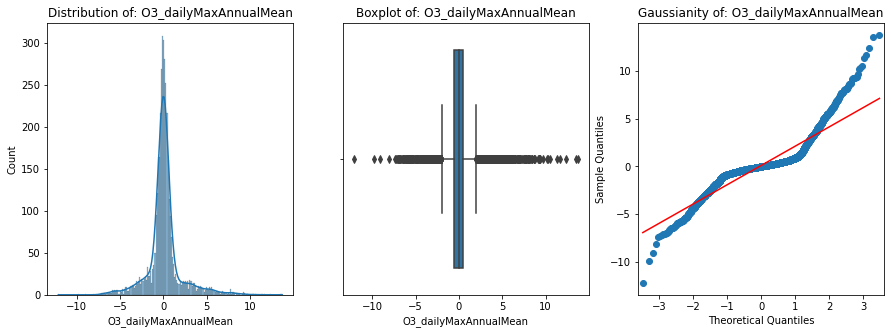

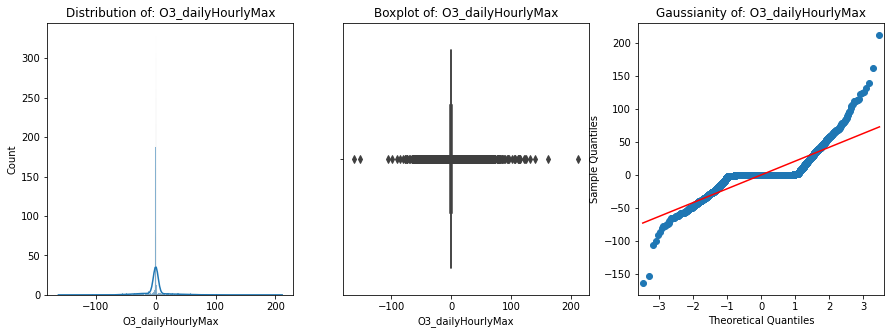

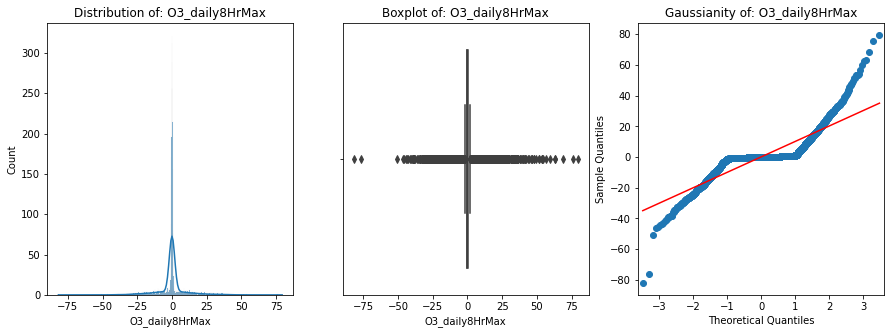

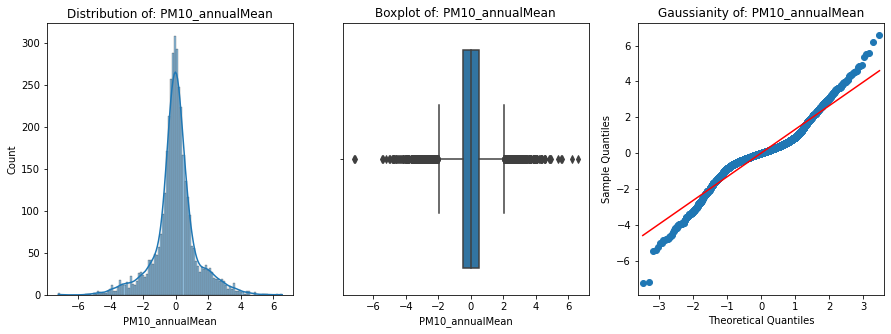

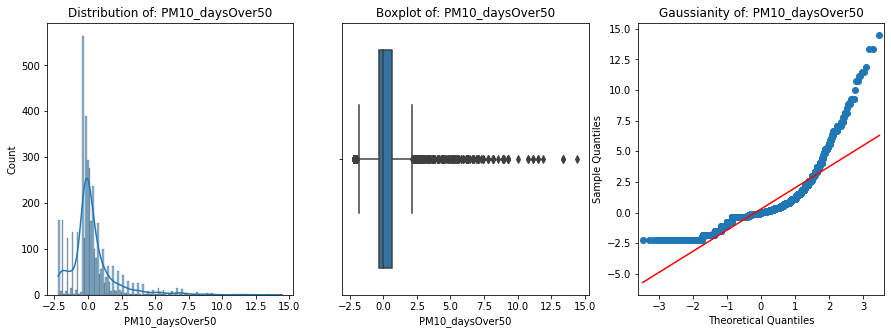

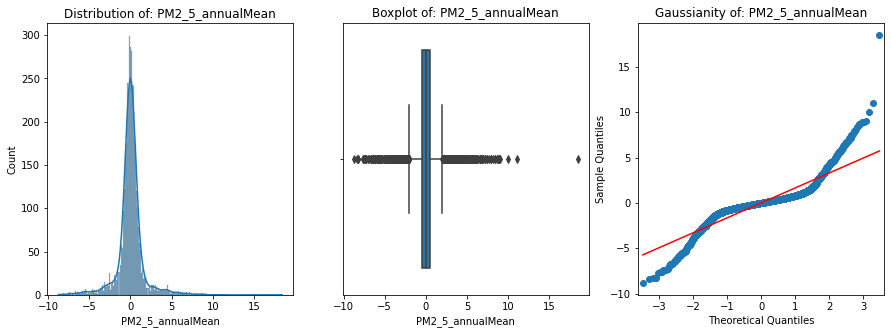

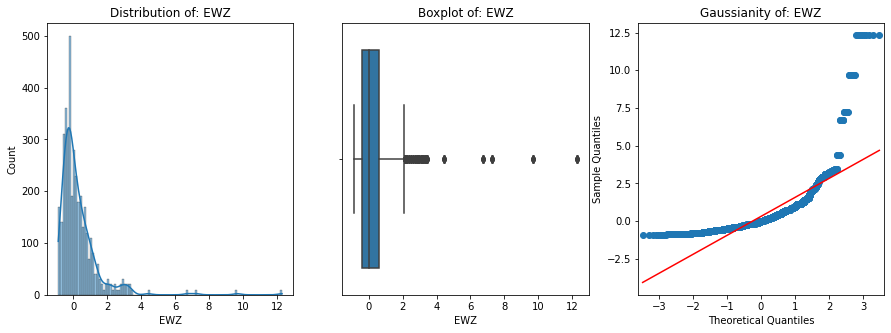

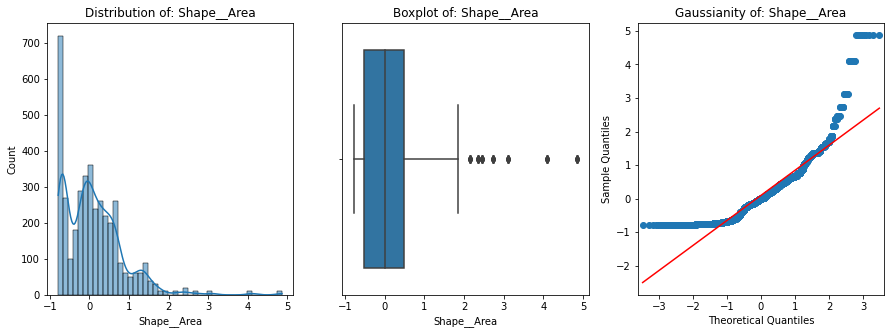

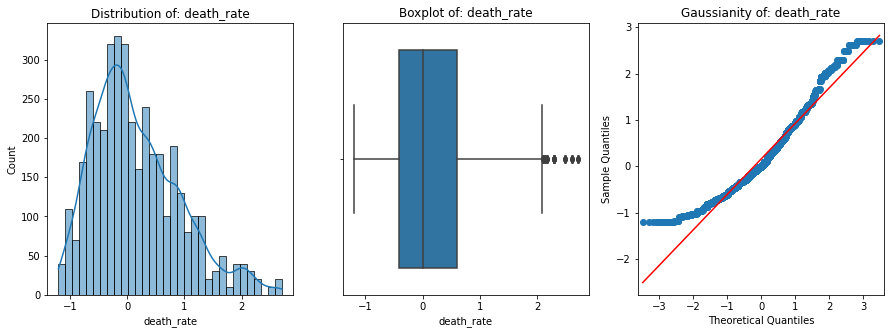

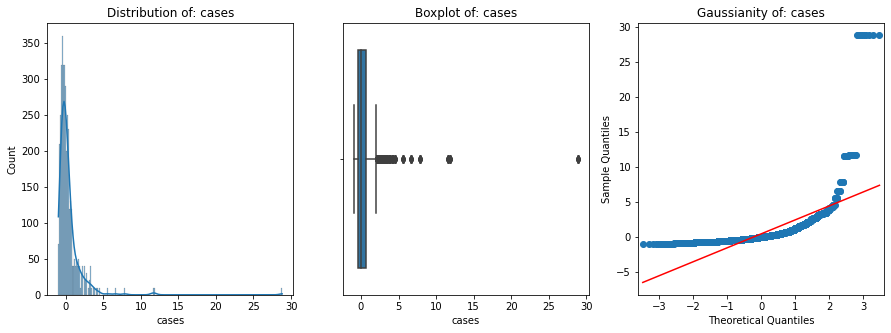

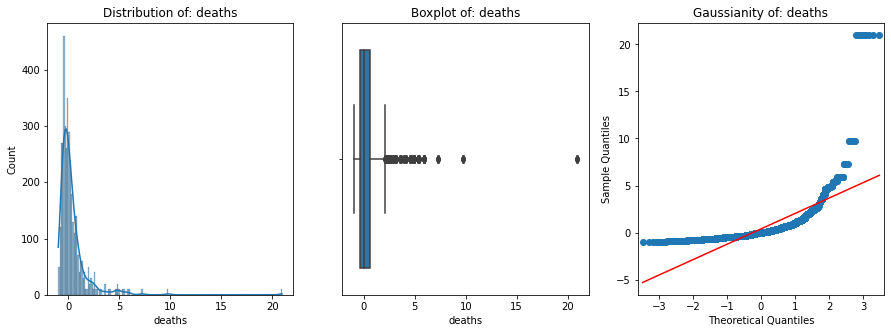

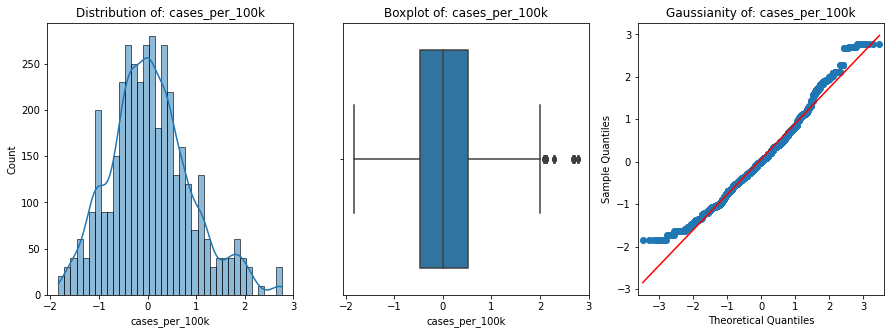

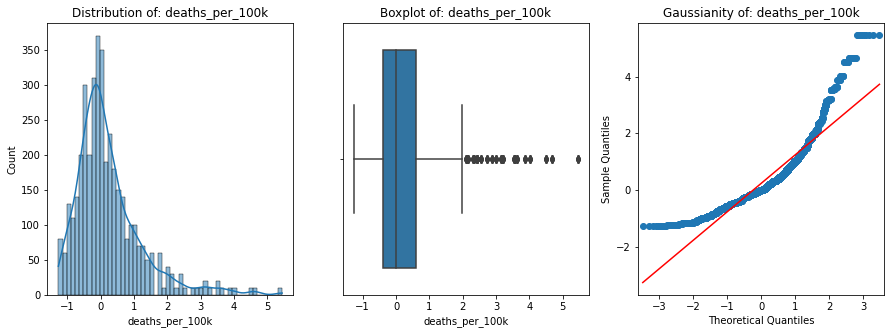

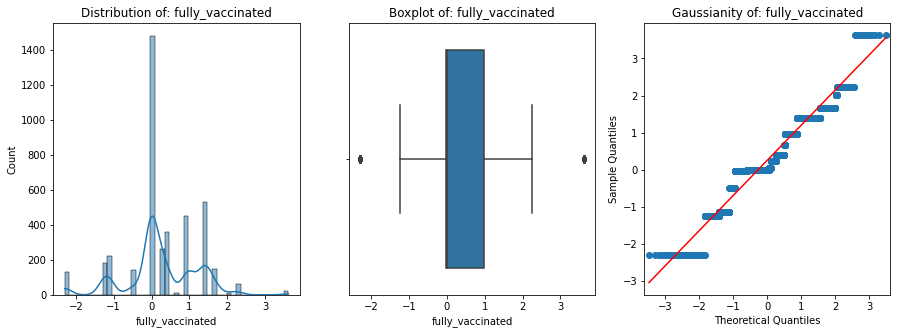

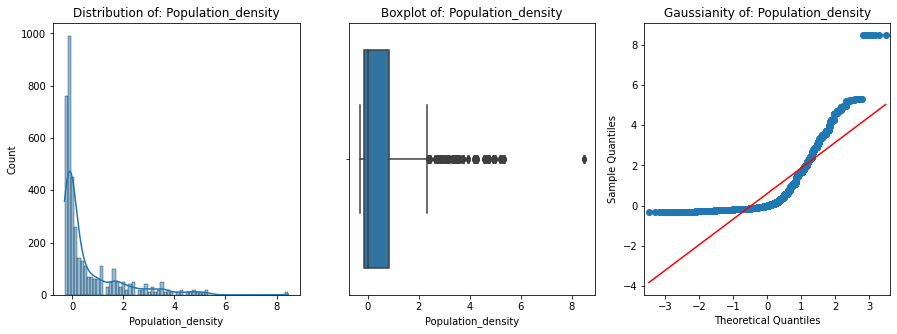

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

for numerical_feature in X_scaled_rb_features.columns:
    
    fig, ax =plt.subplots(1,3,figsize=(15,5))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(x = X_scaled_rb_features[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(x = X_scaled_rb_features[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(X_scaled_rb_features[numerical_feature],line='s',ax=ax[2])
    fig.show();

## Testing the Standard Scaler

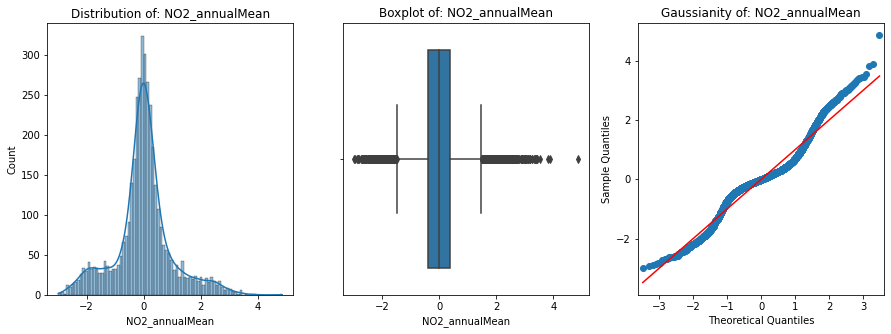

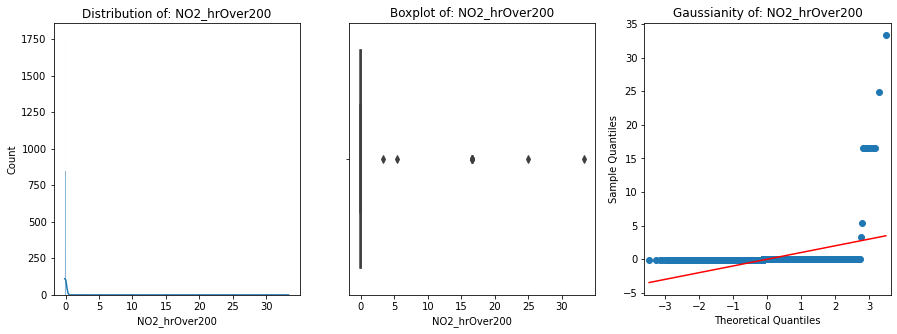

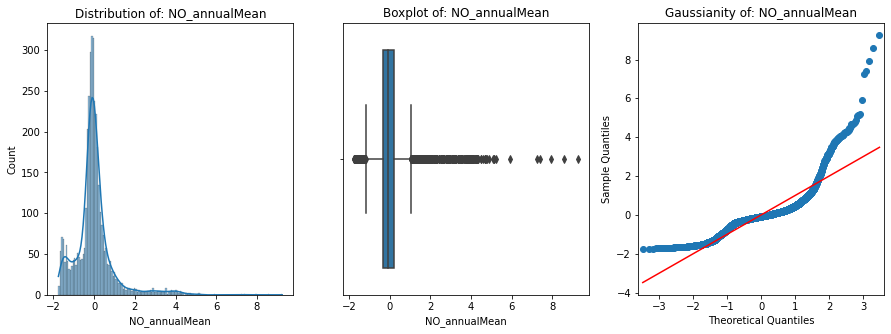

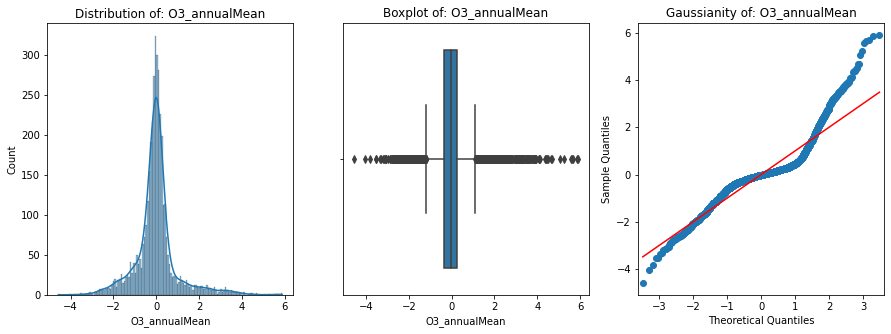

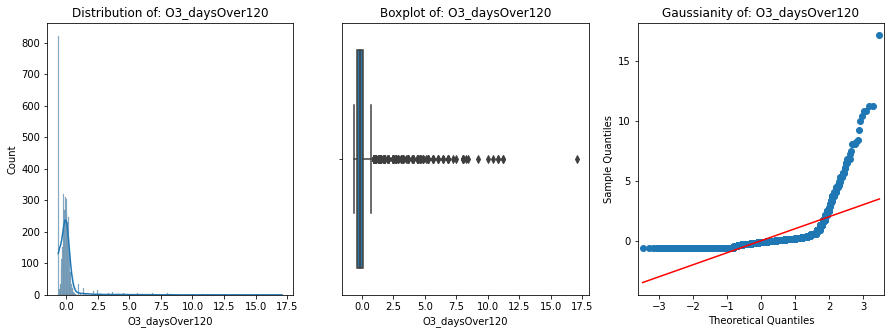

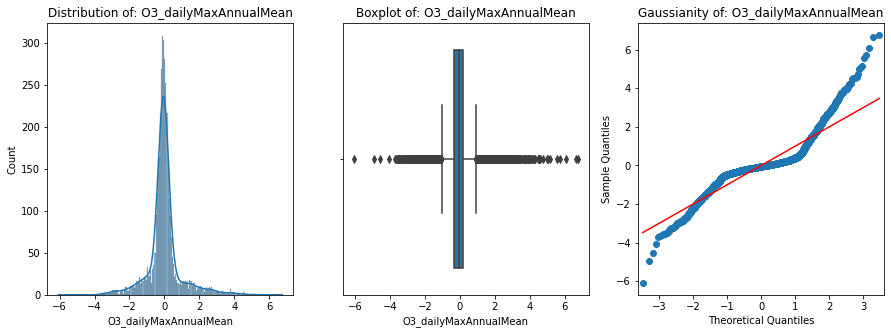

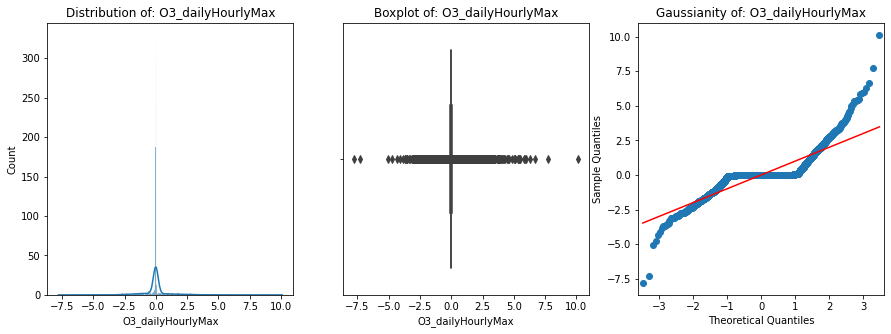

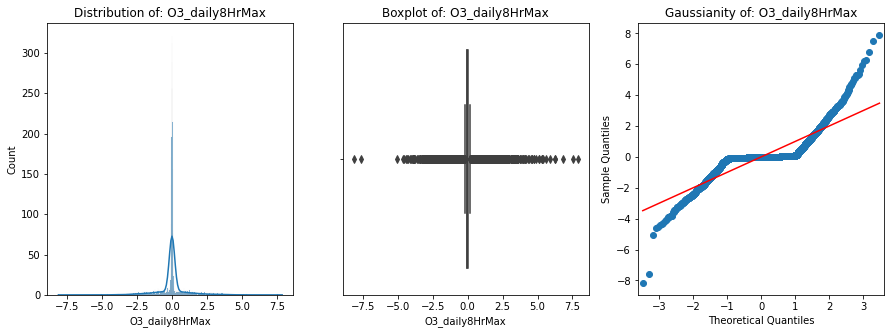

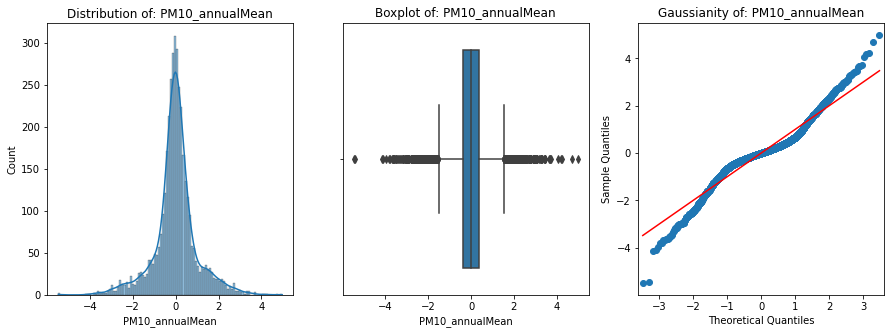

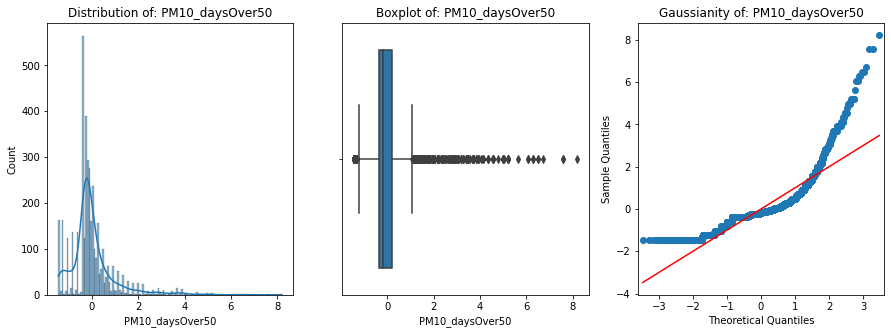

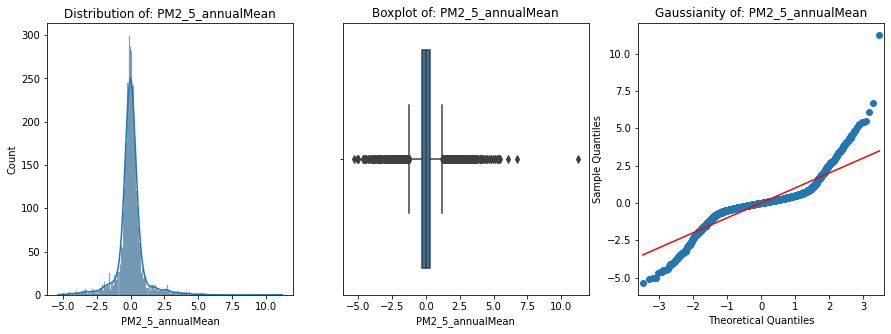

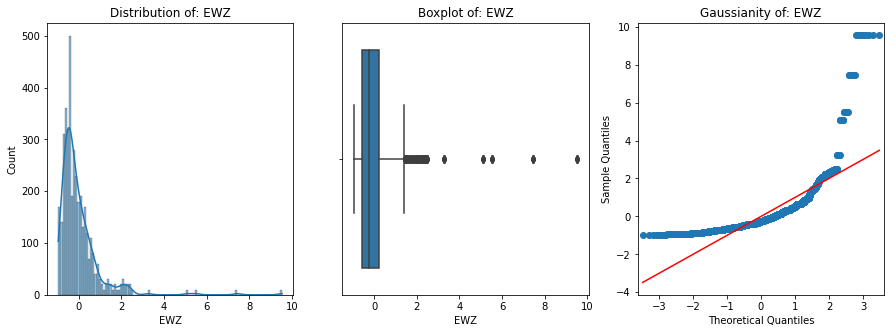

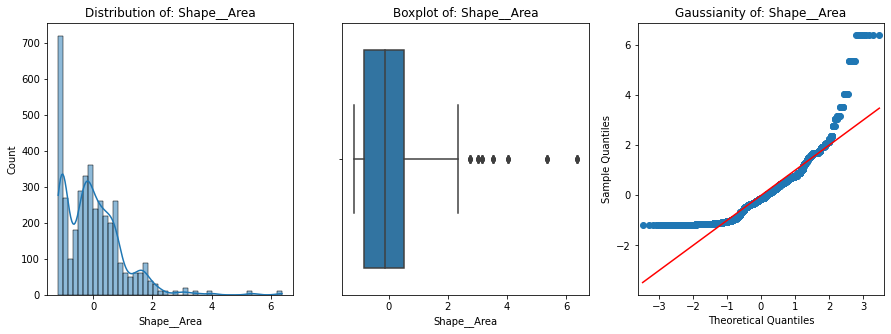

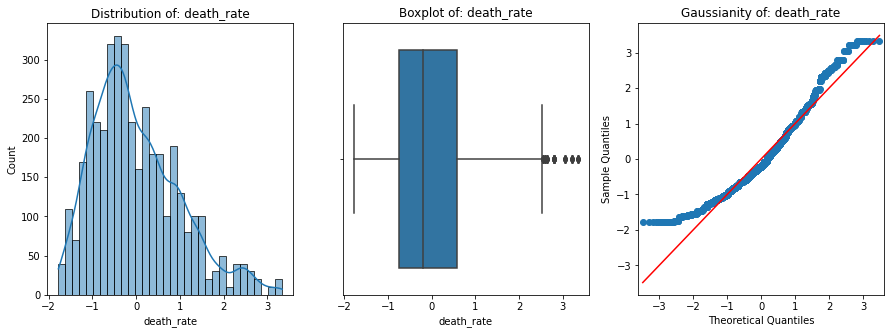

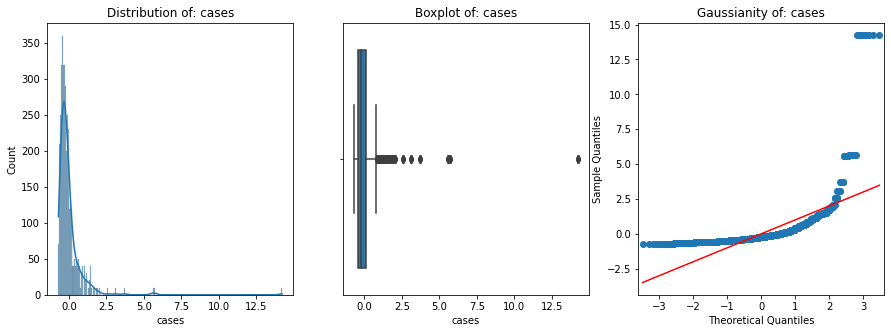

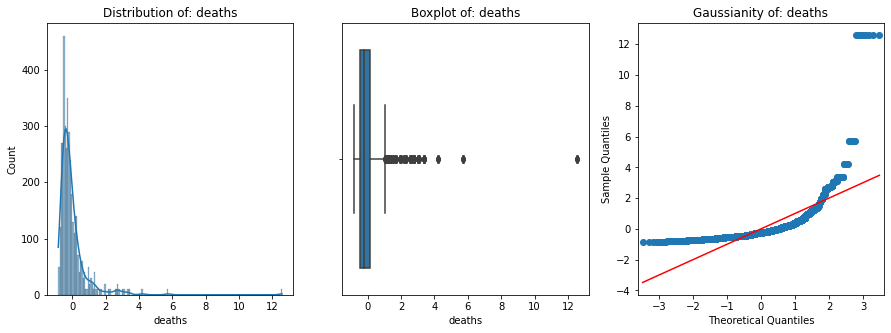

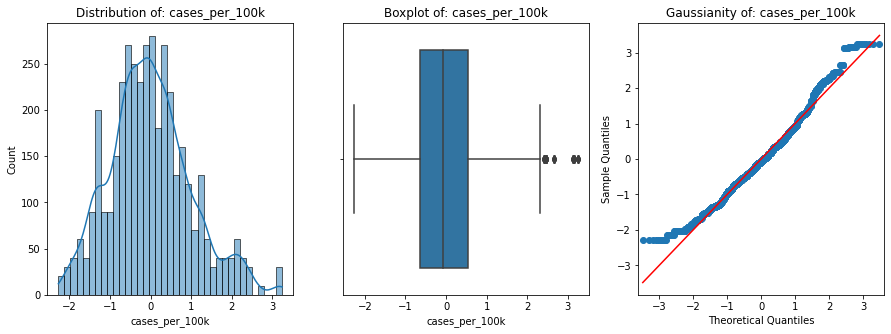

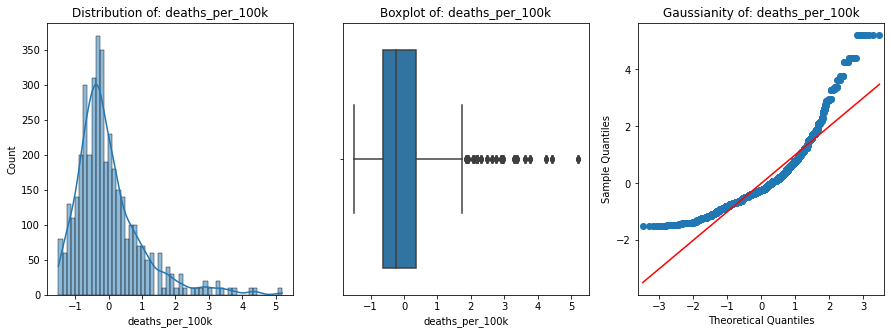

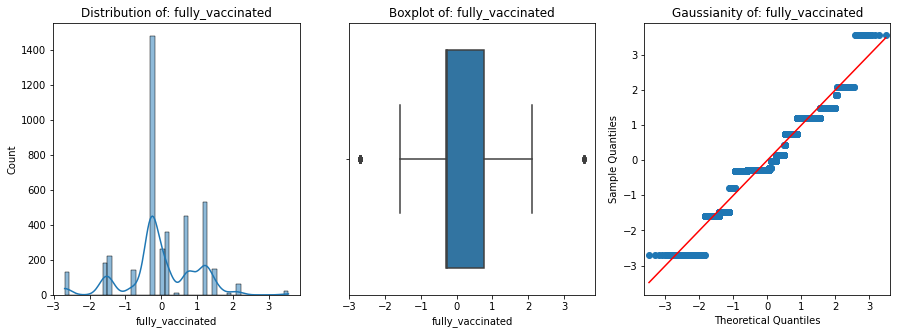

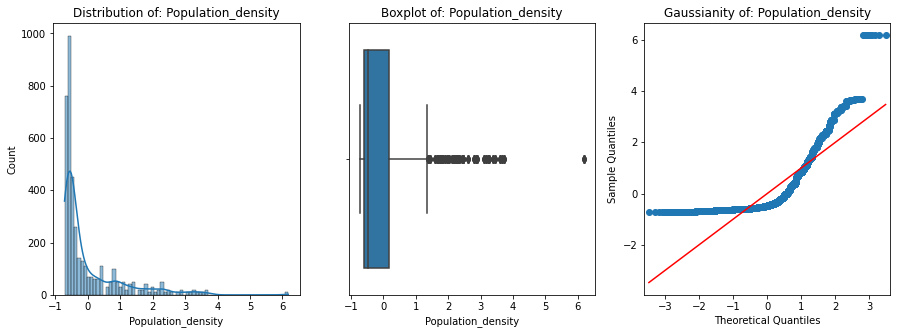

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

for numerical_feature in X_scaled_ss_features.columns:
    
    fig, ax =plt.subplots(1,3,figsize=(15,5))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(x = X_scaled_ss_features[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(x = X_scaled_ss_features[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(X_scaled_ss_features[numerical_feature],line='s',ax=ax[2])
    fig.show();

## Testing the MinMaxScaler

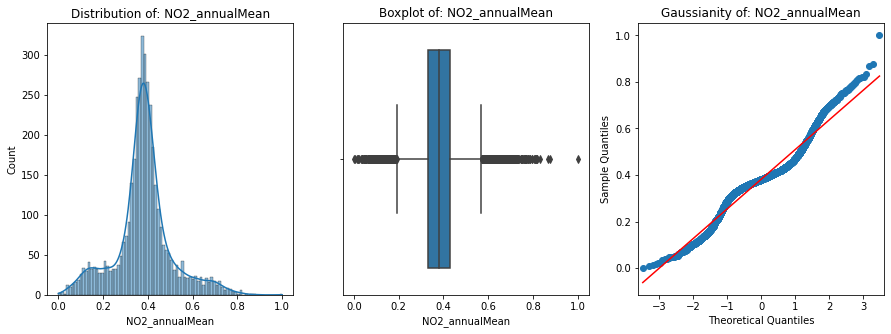

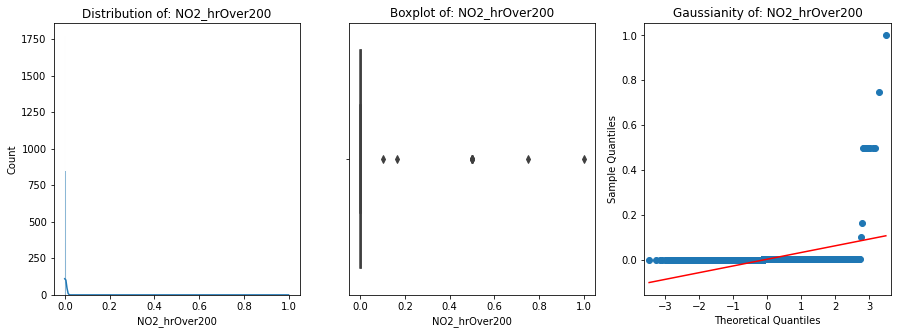

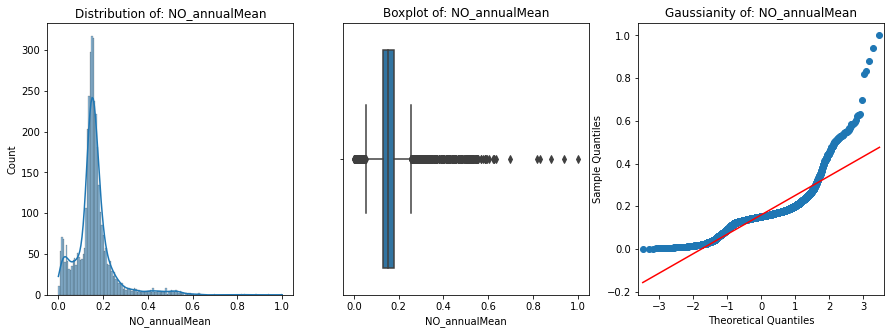

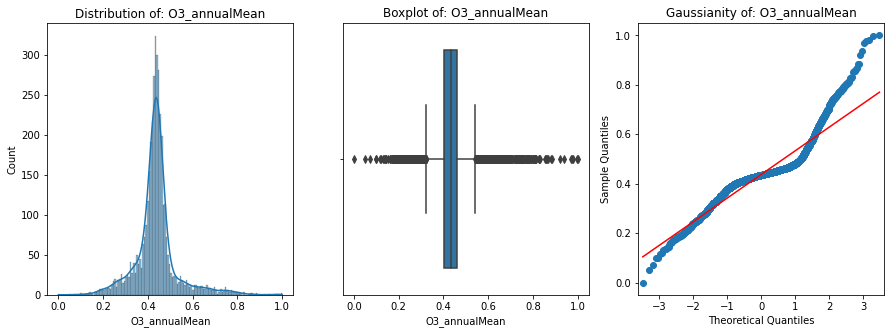

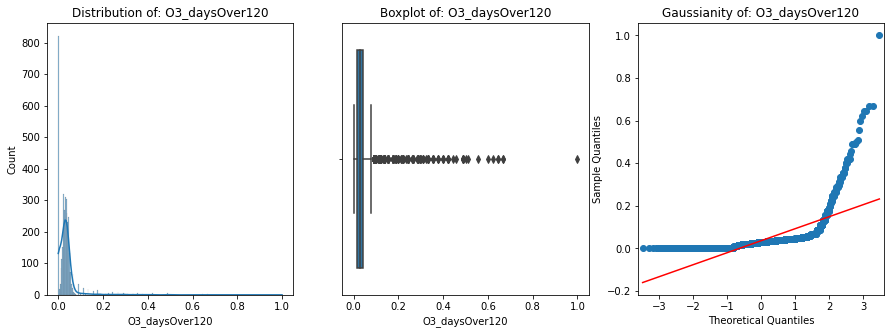

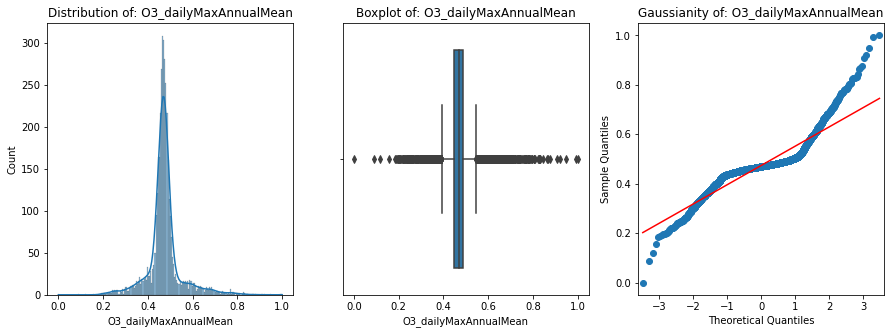

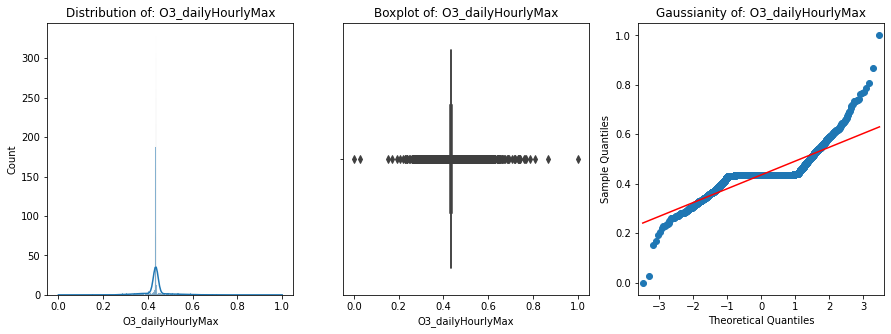

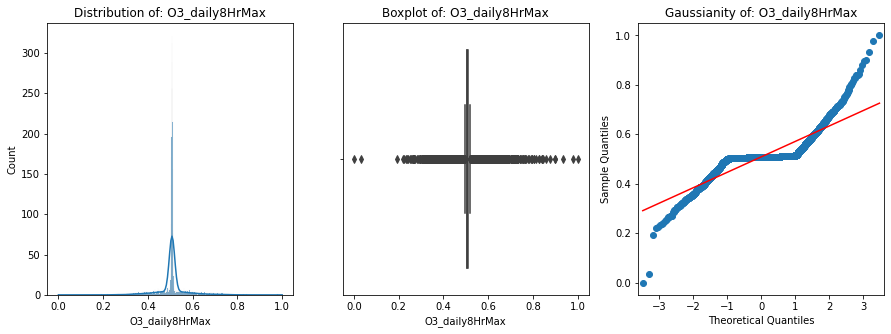

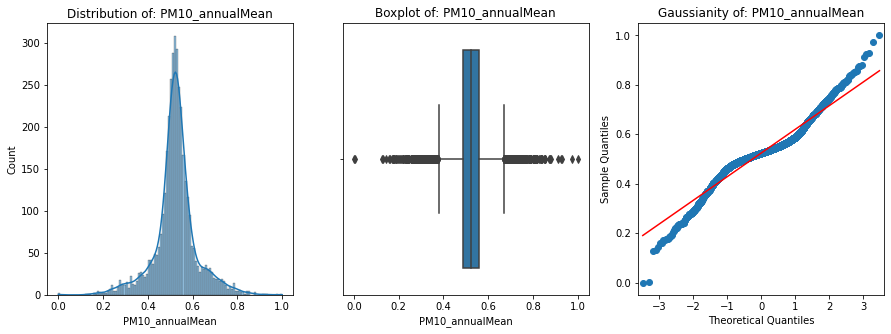

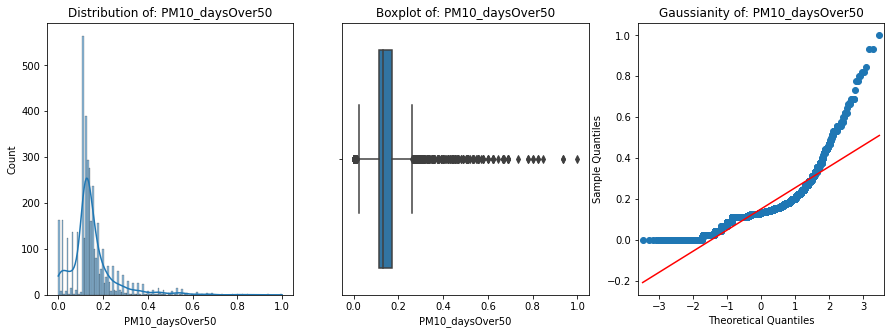

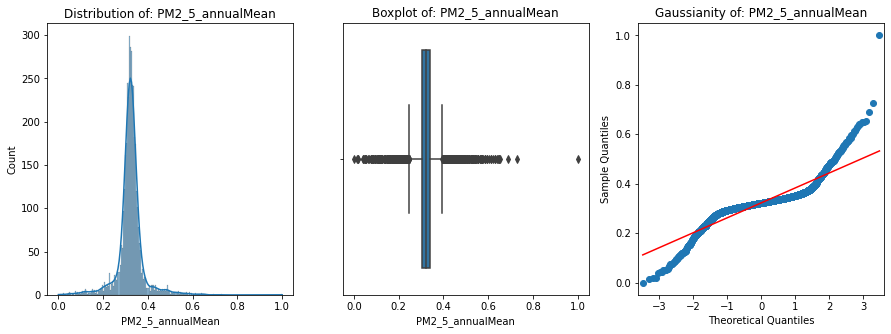

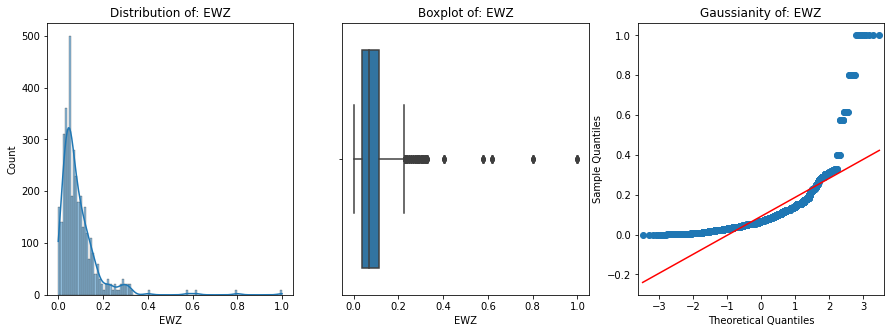

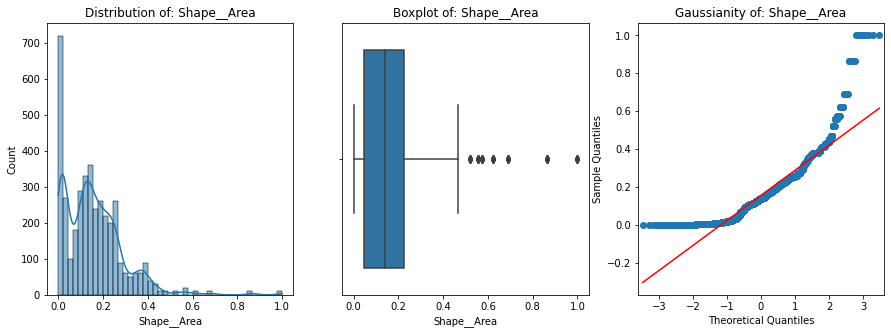

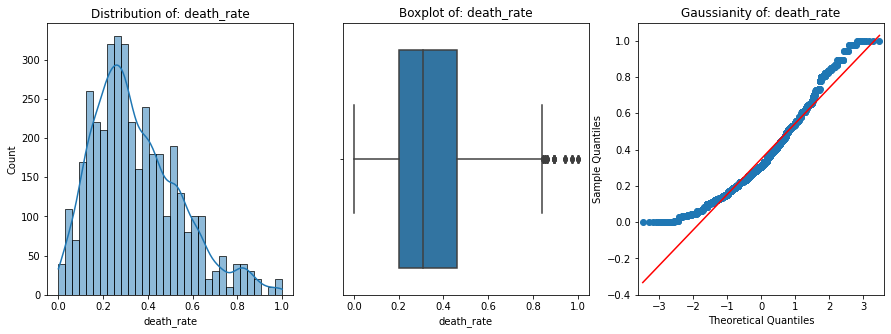

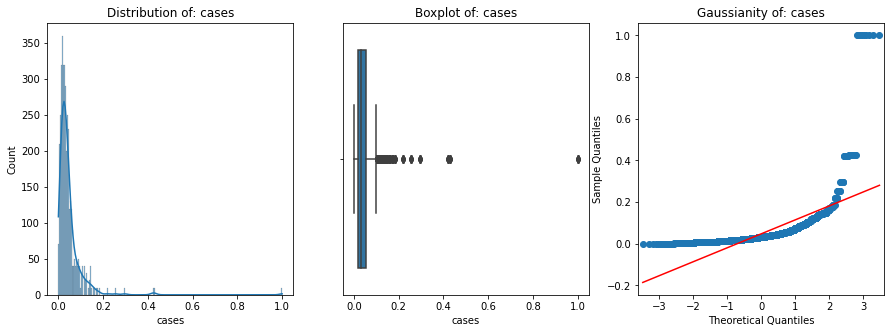

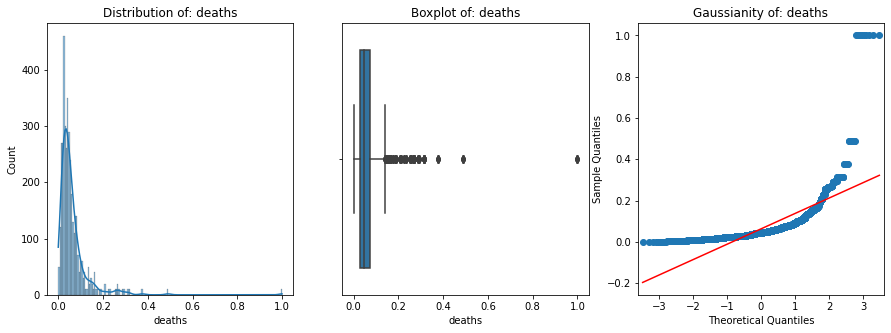

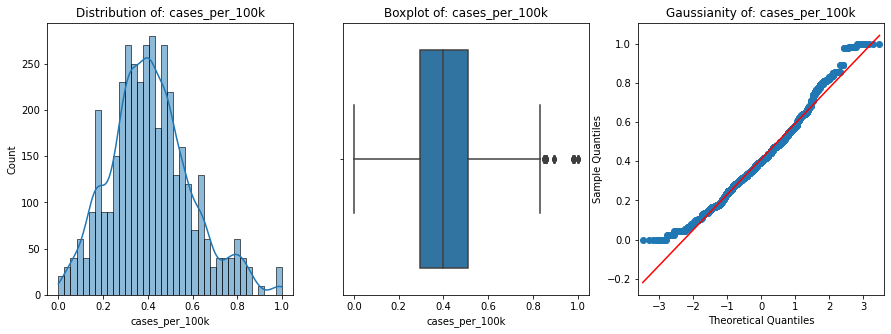

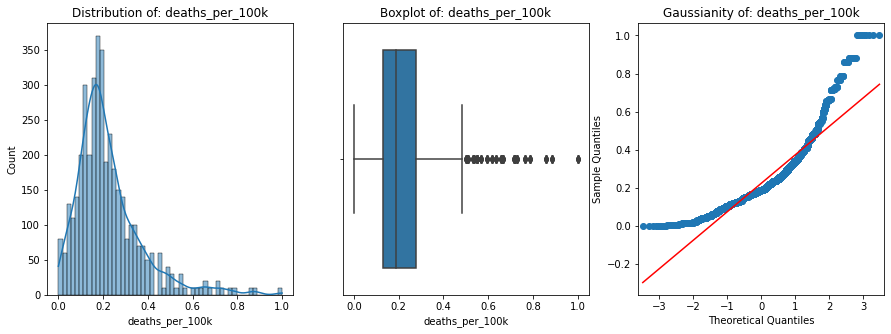

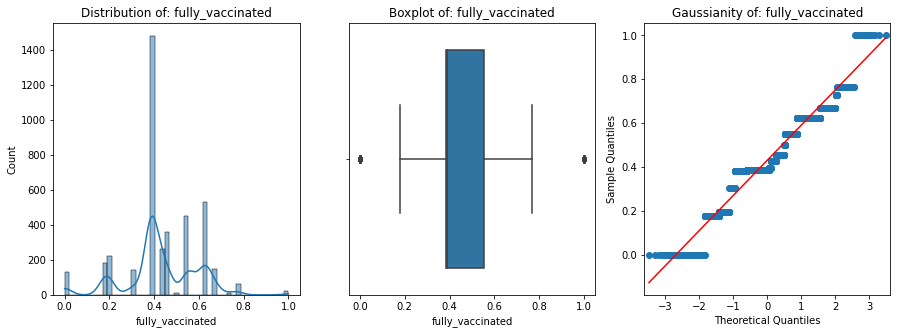

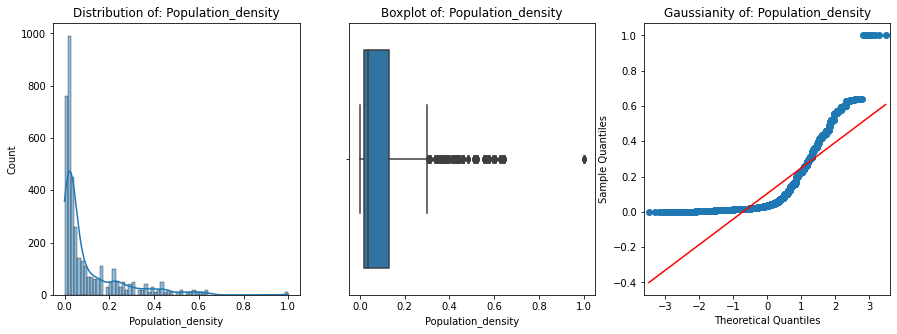

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

for numerical_feature in X_scaled_mm_features.columns:
    
    fig, ax =plt.subplots(1,3,figsize=(15,5))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(x = X_scaled_mm_features[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(x = X_scaled_mm_features[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(X_scaled_mm_features[numerical_feature],line='s',ax=ax[2])
    fig.show();

# Detecting Outliers

## NO2 Annual Mean

<AxesSubplot:>

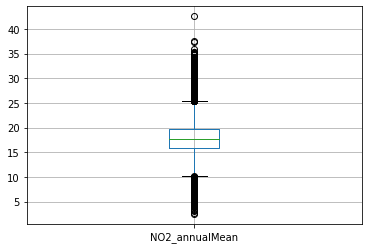

In [24]:
data_merged[['NO2_annualMean']].boxplot()

I wouldn't do anything about it, since these values are possible in the reality

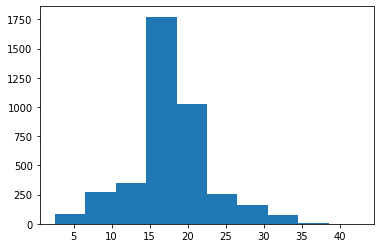

In [25]:
plt.hist(data_merged['NO2_annualMean']);

## NO2: hours over 200

In [26]:
print(data_merged.NO2_hrOver200.unique().min())
print(data_merged.NO2_hrOver200.unique().max())
print(data_merged.NO2_hrOver200.unique().mean())

0.0
2.0
0.009051628605752872


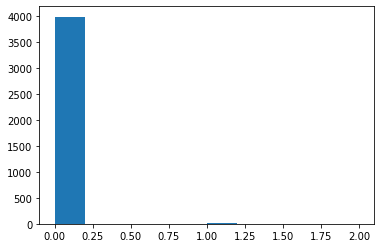

In [27]:
plt.hist(data_merged['NO2_hrOver200']);

## NO_annualMean

<AxesSubplot:>

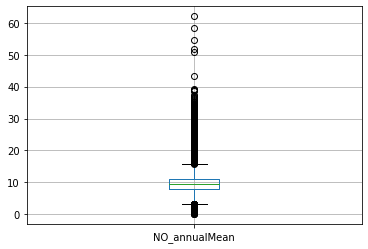

In [28]:
data_merged[['NO_annualMean']].boxplot()

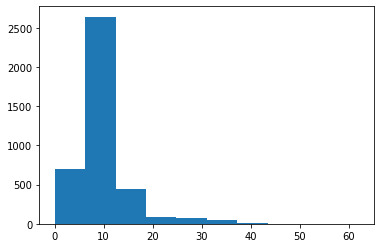

In [29]:
plt.hist(data_merged['NO_annualMean']);

In [30]:
data_merged.NO_annualMean.max()

62.09627

In [31]:
data_merged.NO_annualMean.min()

0.0

In [32]:
data_merged['NO_annualMean'] = data_merged['NO_annualMean'].apply(lambda x : x if x > 0 else 0)

In [33]:
data_merged.NO_annualMean.min()

0.0

## O3 annual Mean

<AxesSubplot:>

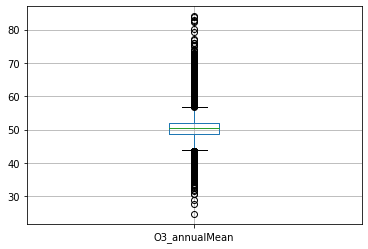

In [34]:
data_merged[['O3_annualMean']].boxplot()

In [35]:
print(data_merged.O3_annualMean.min())
print(data_merged.O3_annualMean.max())

24.68885
83.99883


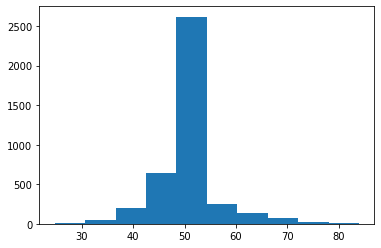

In [36]:
plt.hist(data_merged['O3_annualMean']);

## O3 daysOver120

<AxesSubplot:>

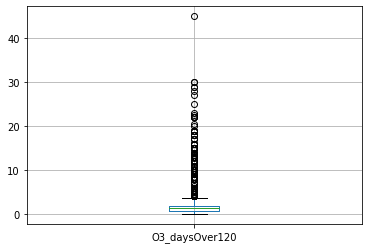

In [37]:
data_merged[['O3_daysOver120']].boxplot()

In [38]:
print(data_merged.O3_daysOver120.min())
print(data_merged.O3_daysOver120.max())

0.0
45.0


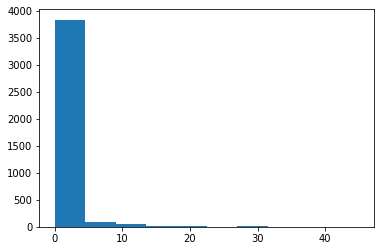

In [39]:
plt.hist(data_merged['O3_daysOver120']);

## O3 dailyMaxAnnualMean

<AxesSubplot:>

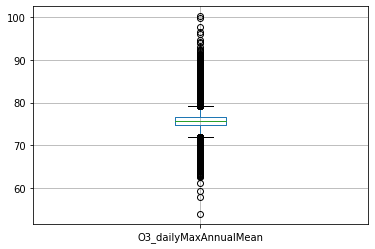

In [40]:
data_merged[['O3_dailyMaxAnnualMean']].boxplot()

In [41]:
print(data_merged.O3_dailyMaxAnnualMean.min())
print(data_merged.O3_dailyMaxAnnualMean.max())

53.9256
100.2454


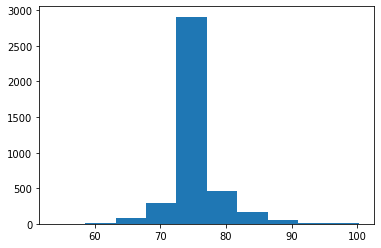

In [42]:
plt.hist(data_merged['O3_dailyMaxAnnualMean']);

## O3 dailyHourlyMax

<AxesSubplot:>

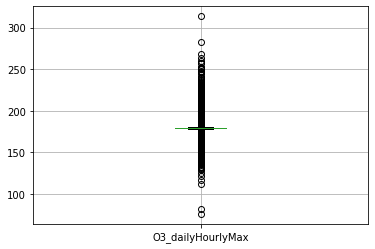

In [43]:
data_merged[['O3_dailyHourlyMax']].boxplot()

In [44]:
print(data_merged.O3_dailyHourlyMax.min())
print(data_merged.O3_dailyHourlyMax.max())

76.08353
313.6


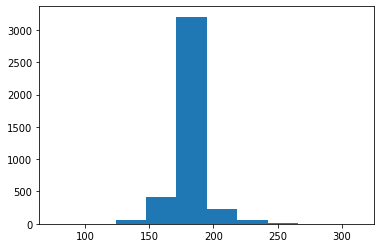

In [45]:
plt.hist(data_merged['O3_dailyHourlyMax']);

## PM10 annual Mean

<AxesSubplot:>

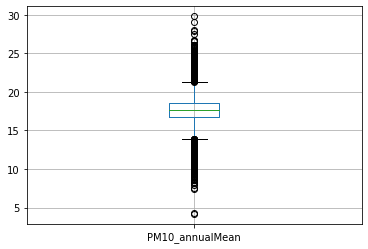

In [46]:
data_merged[['PM10_annualMean']].boxplot()

In [47]:
print(data_merged.PM10_annualMean.min())
print(data_merged.PM10_annualMean.max())

4.169562
29.80406


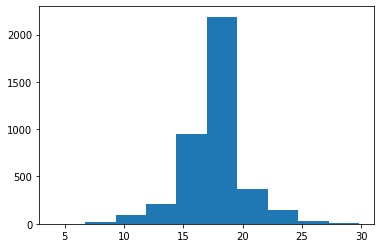

In [48]:
plt.hist(data_merged['PM10_annualMean']);

## PM10 days Over 50

<AxesSubplot:>

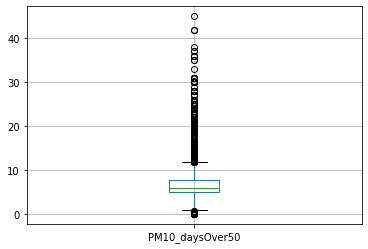

In [49]:
data_merged[['PM10_daysOver50']].boxplot()

In [50]:
print(data_merged.PM10_daysOver50.min())
print(data_merged.PM10_daysOver50.max())

0.0
45.0


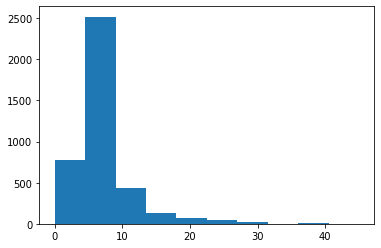

In [51]:
plt.hist(data_merged['PM10_daysOver50']);

## PM2.5 annual Mean

<AxesSubplot:>

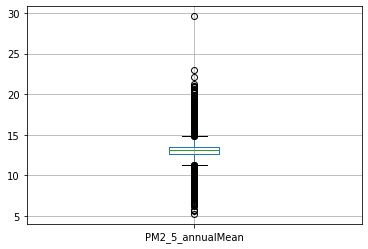

In [52]:
data_merged[['PM2_5_annualMean']].boxplot()

In [53]:
print(data_merged.PM2_5_annualMean.min())
print(data_merged.PM2_5_annualMean.max())

5.254934
29.59881


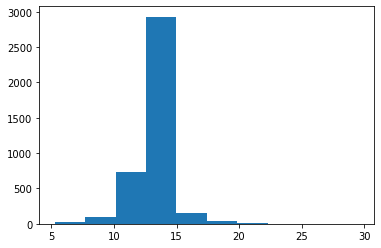

In [54]:
plt.hist(data_merged['PM2_5_annualMean']);

## Death rate

<AxesSubplot:>

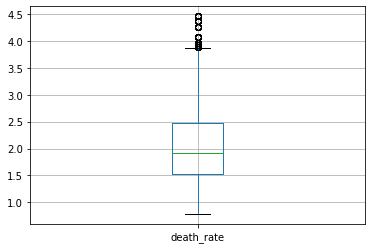

In [55]:
data_merged[['death_rate']].boxplot()

In [56]:
print(data_merged.death_rate.min())
print(data_merged.death_rate.max())

0.78125
4.46345198520898


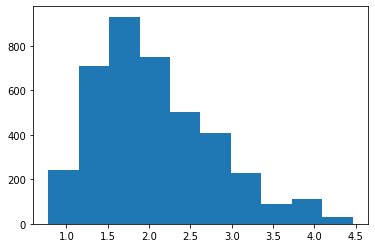

In [57]:
plt.hist(data_merged['death_rate']);

## Cases

<AxesSubplot:>

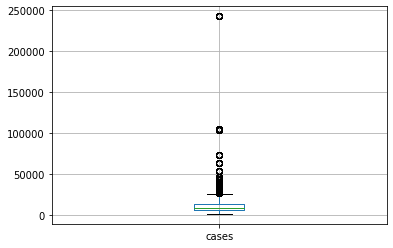

In [58]:
data_merged[['cases']].boxplot()

In [59]:
print(data_merged.cases.min())
print(data_merged.cases.max())

1152
242813


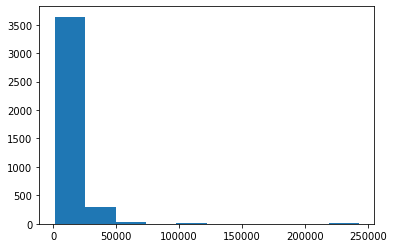

In [60]:
plt.hist(data_merged['cases']);

## Cases per 100k

<AxesSubplot:>

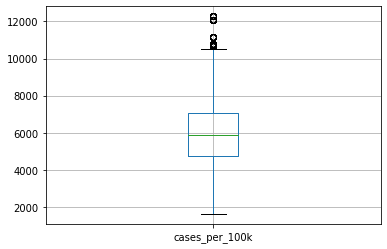

In [61]:
data_merged[['cases_per_100k']].boxplot()

In [62]:
print(data_merged.cases_per_100k.min())
print(data_merged.cases_per_100k.max())

1638.15296127651
12268.7298330607


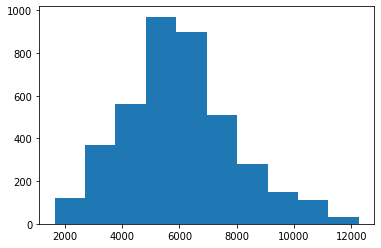

In [63]:
plt.hist(data_merged['cases_per_100k']);

## Deaths per 100k

<AxesSubplot:>

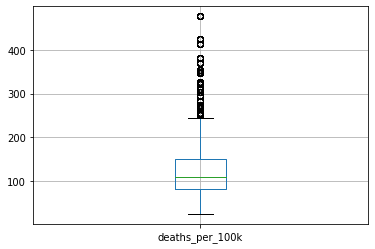

In [64]:
data_merged[['deaths_per_100k']].boxplot()

In [65]:
print(data_merged.deaths_per_100k.min())
print(data_merged.deaths_per_100k.max())

24.02052663184904
476.9354800086208


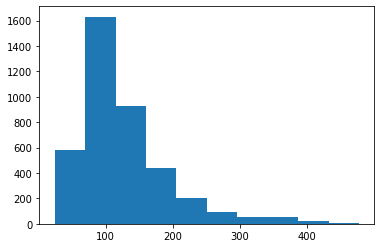

In [66]:
plt.hist(data_merged['deaths_per_100k']);

## Fully vaccinated

<AxesSubplot:>

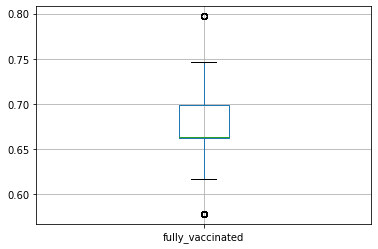

In [67]:
data_merged[['fully_vaccinated']].boxplot()

In [68]:
print(data_merged.fully_vaccinated.min())
print(data_merged.fully_vaccinated.max())

0.578
0.797


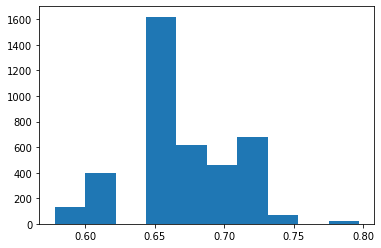

In [69]:
plt.hist(data_merged['fully_vaccinated']);

## Population density

<AxesSubplot:>

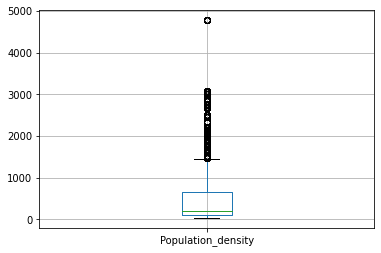

In [70]:
data_merged[['Population_density']].boxplot()

In [71]:
print(data_merged.Population_density.min())
print(data_merged.Population_density.max())

35.572472996384874
4778.511857111082


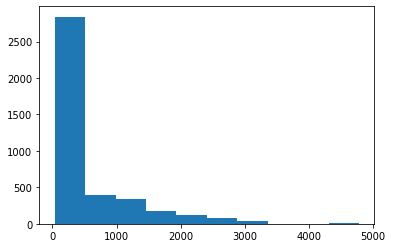

In [72]:
plt.hist(data_merged['Population_density']);